In [1]:
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

D:\anaconda3\envs\moran\lib\site-packages\libpysal\cg\alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
D:\anaconda3\envs\moran\lib\site-packages\libpysal\cg\alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
D:\anaconda3\envs\moran\lib\site-packages\libpysal\cg\alpha_shapes.py:199: Numb

In [2]:
from shapely.geometry import Point
from pylab import figure, scatter, show

In [4]:
plt.rcParams['font.family'] = 'Arial' # 设置字体样式
plt.rcParams['font.size'] = '10'
plt.rcParams['figure.dpi'] = 300

In [7]:
gdf = gpd.read_file('../0_grid/grids/grid_exclude_non_yardang.shp')

In [5]:
w = lps.weights.Queen.from_shapefile(
        '../0_grid/grids/grid_exclude_non_yardang.shp',
        idVariable='id')
w.transform = 'r'

('WARNING: ', 12707, ' is an island (no neighbors)')
('WARNING: ', 16350, ' is an island (no neighbors)')
('WARNING: ', 21419, ' is an island (no neighbors)')
('WARNING: ', 25344, ' is an island (no neighbors)')
('WARNING: ', 25356, ' is an island (no neighbors)')
('WARNING: ', 26127, ' is an island (no neighbors)')
('WARNING: ', 26226, ' is an island (no neighbors)')
('WARNING: ', 26503, ' is an island (no neighbors)')
('WARNING: ', 27316, ' is an island (no neighbors)')
('WARNING: ', 27872, ' is an island (no neighbors)')
('WARNING: ', 28931, ' is an island (no neighbors)')
('WARNING: ', 28999, ' is an island (no neighbors)')
('WARNING: ', 30644, ' is an island (no neighbors)')
('WARNING: ', 31466, ' is an island (no neighbors)')
('WARNING: ', 31495, ' is an island (no neighbors)')
('WARNING: ', 31779, ' is an island (no neighbors)')
('WARNING: ', 32039, ' is an island (no neighbors)')
('WARNING: ', 32629, ' is an island (no neighbors)')
('WARNING: ', 34539, ' is an island (no neighb

In [32]:
y = gdf['coverage']
mi = esda.moran.Moran(y, w)

print("Moran's I 值为：",mi.I)
print("随机分布假设下Z检验值为：",mi.z_rand)
print("随机分布假设下Z检验的P值为：",mi.p_rand)
print("正态分布假设下Z检验值为：",mi.z_norm)
print("正态分布假设下Z检验的P值为：",mi.p_norm)

Moran's I 值为： 0.6270719818302799
随机分布假设下Z检验值为： 201.52300560011554
随机分布假设下Z检验的P值为： 0.0
正态分布假设下Z检验值为： 201.46955555141423
正态分布假设下Z检验的P值为： 0.0


D:\anaconda3\envs\moran\lib\site-packages\splot\_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


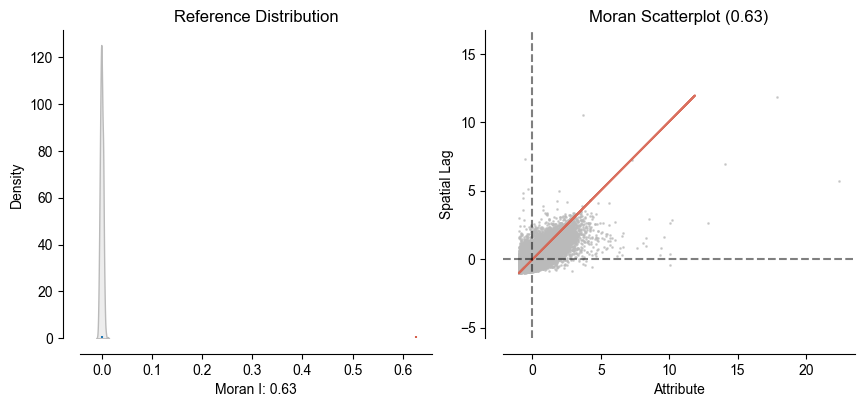

In [43]:
from splot.esda import plot_moran
plot_moran(mi, zstandard=True, 
           aspect_equal = True,
           #log_scale = (False,True),
           scatter_kwds =dict(s=1),
           figsize=(10,4))
plt.show()

In [36]:
mi_loc = esda.moran.Moran_Local(y, w)

In [40]:
from splot.esda import moran_scatterplot

(<Figure size 700x700 with 1 Axes>,
 <Axes: title={'center': 'Moran Local Scatterplot'}, xlabel='Attribute', ylabel='Spatial Lag'>)

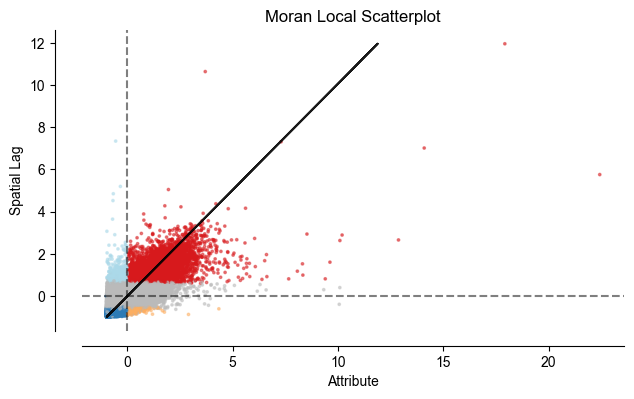

In [49]:
moran_scatterplot(mi_loc, p=0.05,
                  scatter_kwds =dict(s=3,alpha=.5),)

In [50]:
gdf_p = gpd.read_file('../points/points_sample.shp')

D:\anaconda3\envs\moran\lib\site-packages\libpysal\cg\shapes.py:103: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
D:\anaconda3\envs\moran\lib\site-packages\libpysal\cg\voronoi.py:173: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  region_df["geometry"] = [Polygon(vertices[region]) for region in regions]
D:\anaconda3\envs\moran\lib\site-packages\libpysal\cg\voronoi.py:176: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, t

Moran's I 值为： 0.220327984991826
随机分布假设下Z检验值为： 313.05947791339406
随机分布假设下Z检验的P值为： 0.0
正态分布假设下Z检验值为： 312.5780806327409
正态分布假设下Z检验的P值为： 0.0


D:\anaconda3\envs\moran\lib\site-packages\splot\_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.22', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.22)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

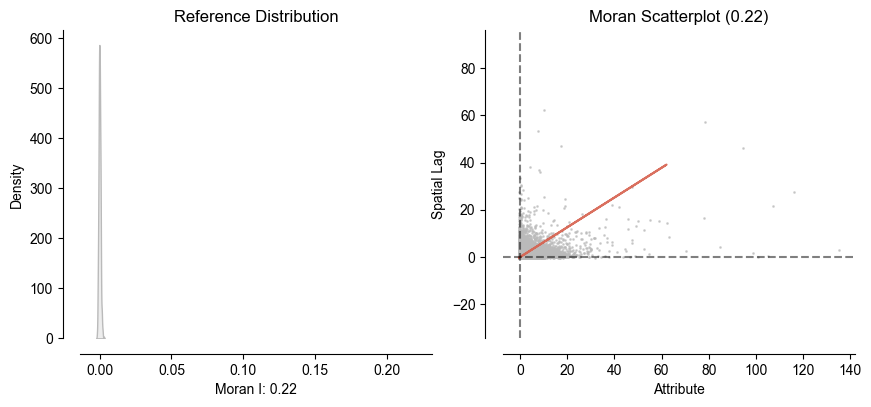

In [52]:
w = lps.weights.Queen.from_shapefile(
        '../points/points_sample.shp',
        #idVariable='id'
)
w.transform = 'r'

y = gdf_p['AREA']
mi = esda.moran.Moran(y, w)

print("Moran's I 值为：",mi.I)
print("随机分布假设下Z检验值为：",mi.z_rand)
print("随机分布假设下Z检验的P值为：",mi.p_rand)
print("正态分布假设下Z检验值为：",mi.z_norm)
print("正态分布假设下Z检验的P值为：",mi.p_norm)


plot_moran(mi, zstandard=True, 
           aspect_equal = True,
           #log_scale = (False,True),
           scatter_kwds =dict(s=1),
           figsize=(10,4))



(<Figure size 700x700 with 1 Axes>,
 <Axes: title={'center': 'Moran Local Scatterplot'}, xlabel='Attribute', ylabel='Spatial Lag'>)

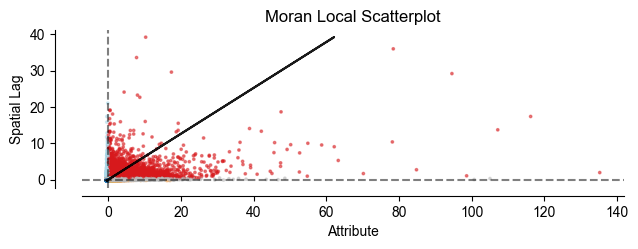

In [53]:
mi_loc = esda.moran.Moran_Local(y, w)
moran_scatterplot(mi_loc, p=0.05,
                  scatter_kwds =dict(s=3,alpha=.5),)

Moran's I 值为： 0.37861358660904887
随机分布假设下Z检验值为： 123.69759399852643
随机分布假设下Z检验的P值为： 0.0
正态分布假设下Z检验值为： 121.64720931989139
正态分布假设下Z检验的P值为： 0.0


D:\anaconda3\envs\moran\lib\site-packages\splot\_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


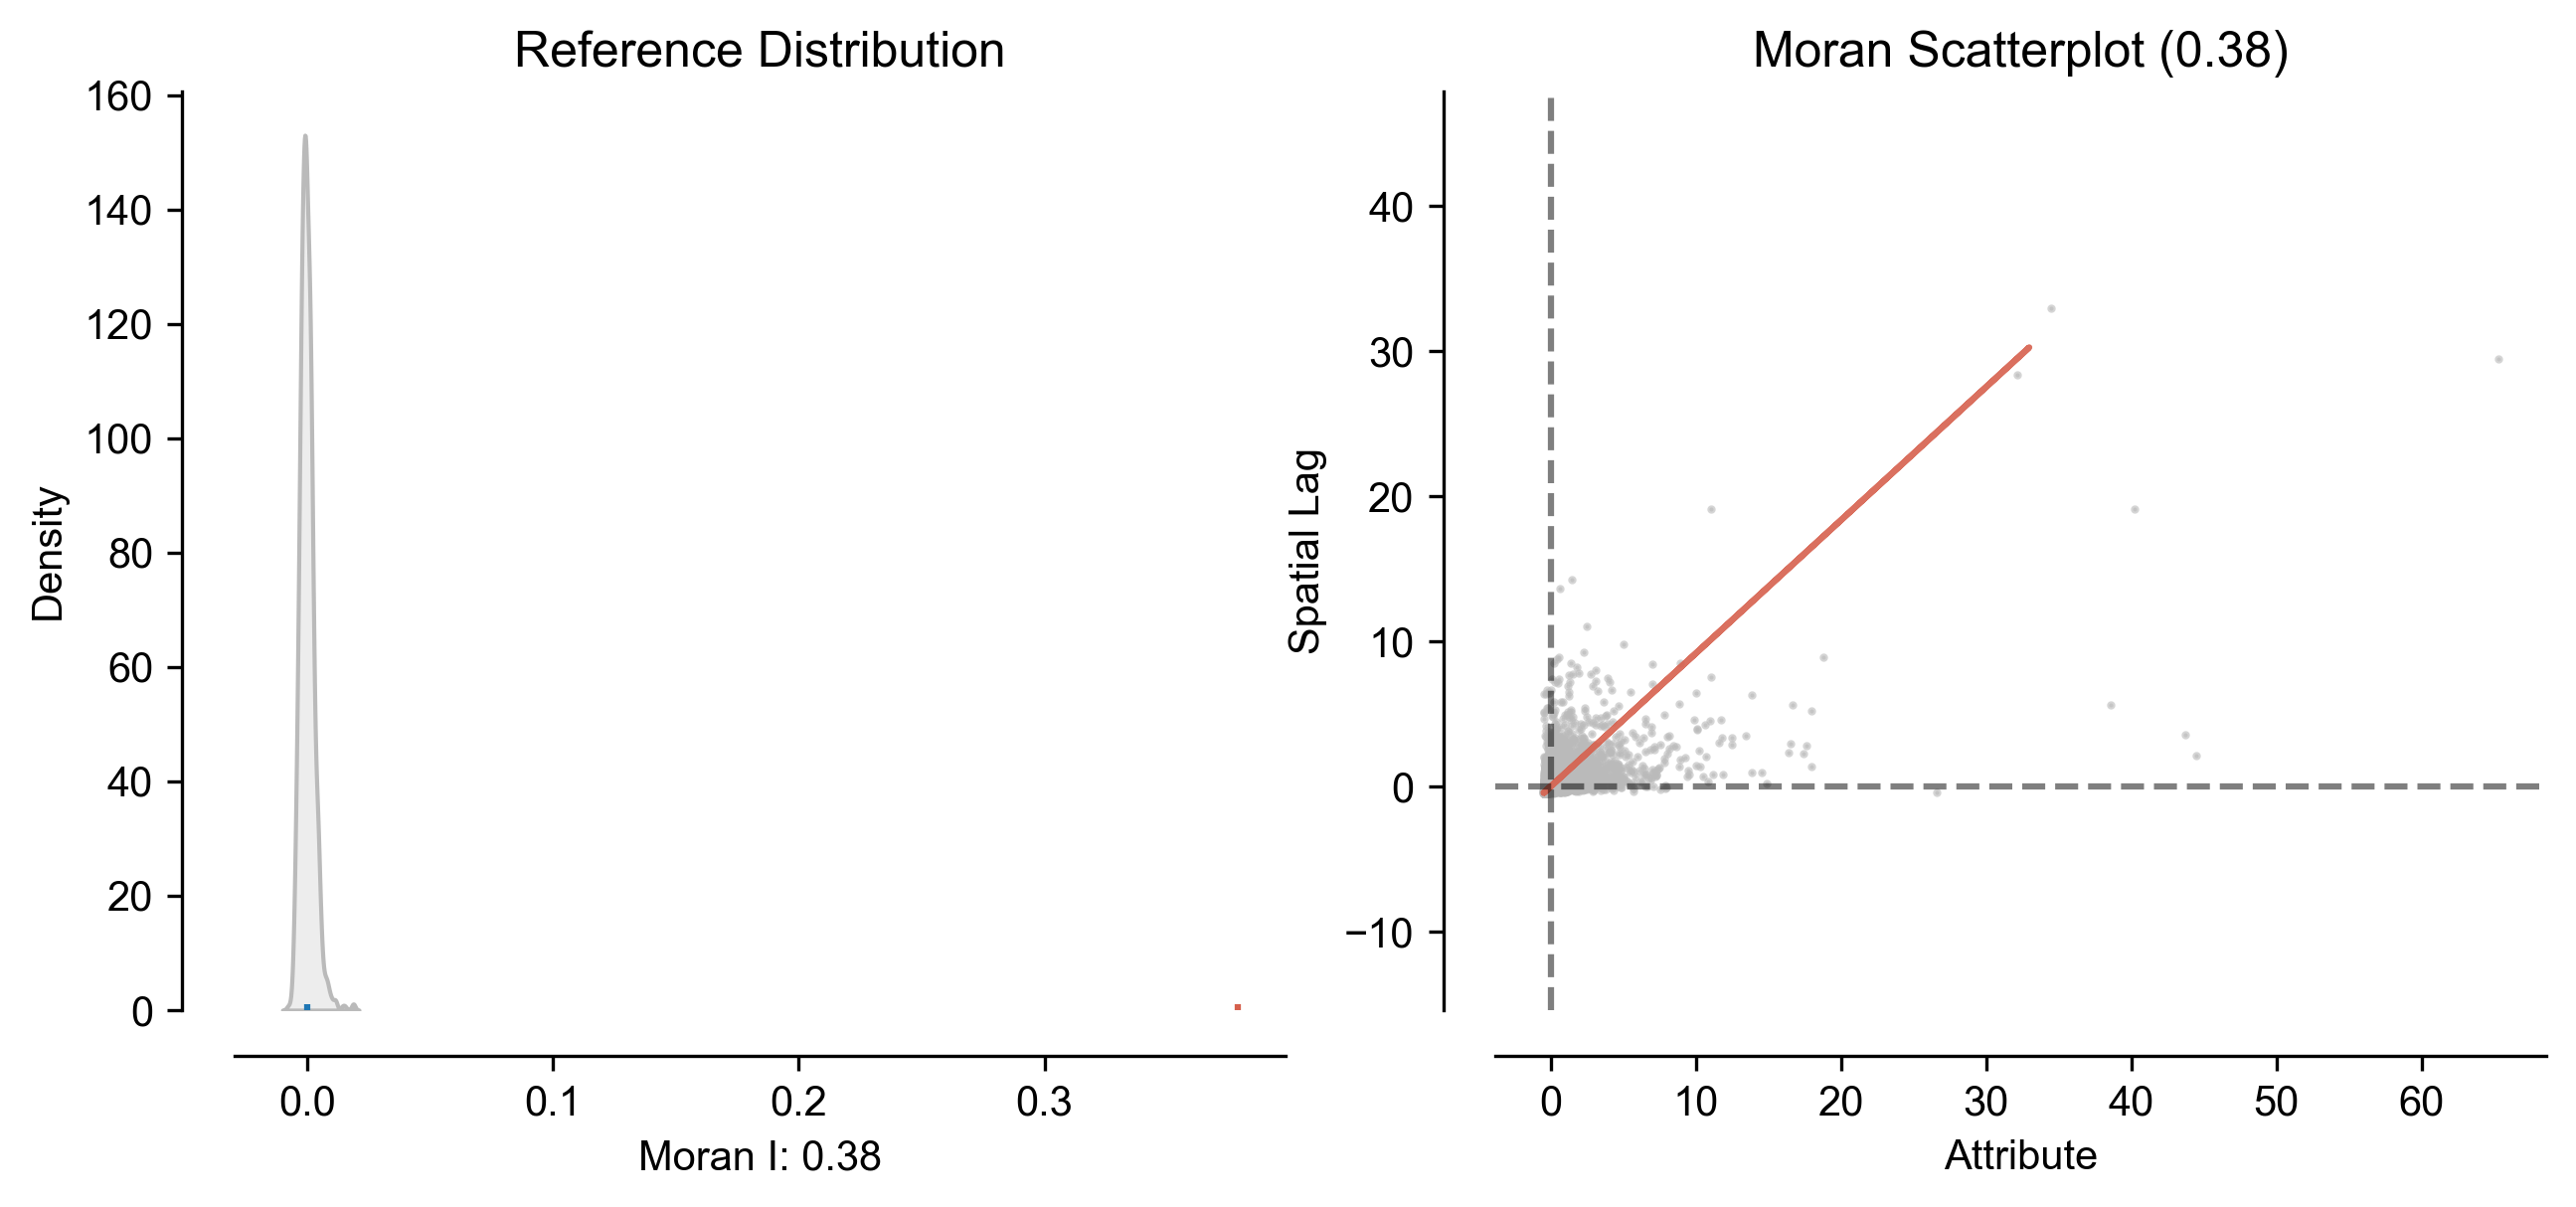

In [8]:
y = gdf['MEAN_AREA']
mi = esda.moran.Moran(y, w)

print("Moran's I 值为：",mi.I)
print("随机分布假设下Z检验值为：",mi.z_rand)
print("随机分布假设下Z检验的P值为：",mi.p_rand)
print("正态分布假设下Z检验值为：",mi.z_norm)
print("正态分布假设下Z检验的P值为：",mi.p_norm)

from splot.esda import plot_moran
plot_moran(mi, zstandard=True, 
           aspect_equal = True,
           #log_scale = (False,True),
           scatter_kwds =dict(s=1),
           figsize=(10,4))
plt.show()